In [ ]:
first_name= "Pouria"
last_name= "Dadkhah"
student_number= "401201381"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [ ]:
# mount drive because the dataset is located in my drive. comment if you don't need it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# set the correct path of dataset
path = "drive/My Drive/DL_HW1/Heart_Disease_Dataset.csv"
df =pd.read_csv(path)
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


The size of dataset:  14280 
The shape of dataset:  (1190, 12) 

Does it have Nan values?  False 

In Danger shape:  (561, 12) 
Not In danger shape:  (629, 12)
ratio of In danger class to whole data: 47.142857142857146 

is data balanced?  True 



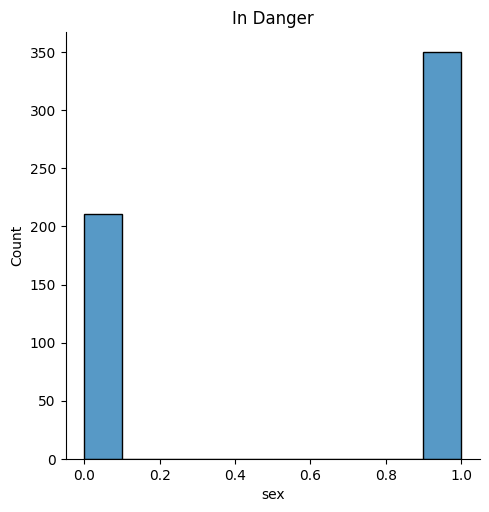

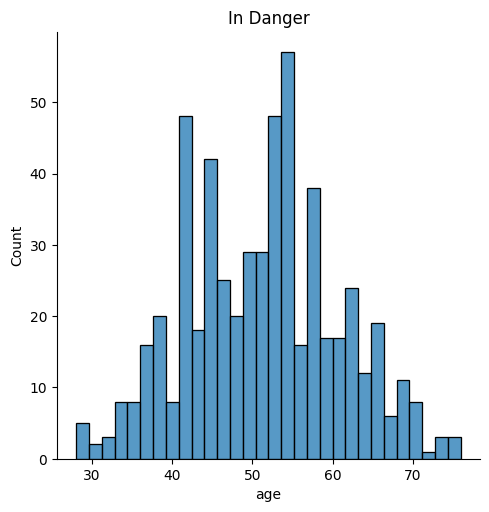

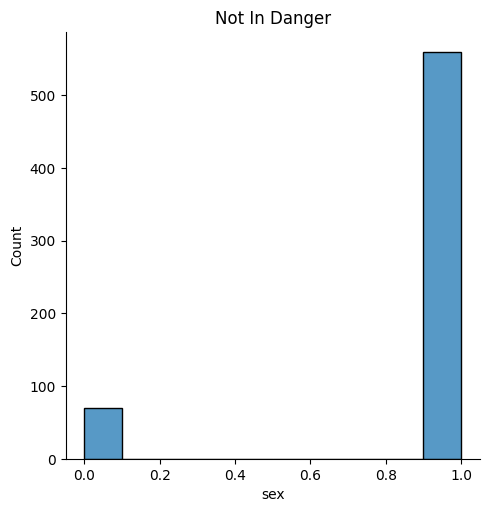

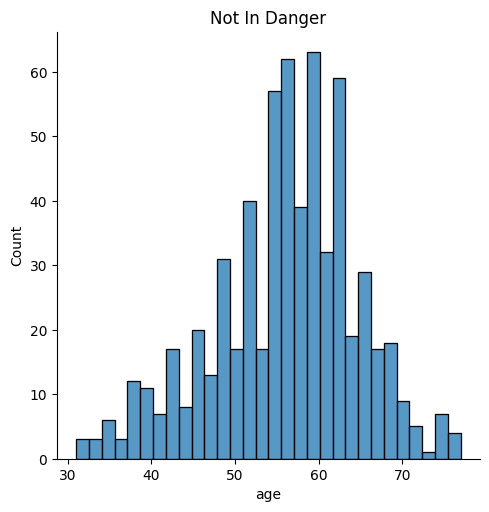

In [11]:
print("The size of dataset: ", df.size,"\nThe shape of dataset: ", df.shape , "\n")

check_nan = df.isna().values.any()
print("Does it have Nan values? ", check_nan , "\n")

# calculate distribution of each class over whole data. we consider balanced in range of (45, 55) percent.
in_danger = df[df["target"] == 0]
not_in_danger = df[df["target"] == 1]
print("In Danger shape: ",in_danger.shape,"\nNot In danger shape: ", not_in_danger.shape)
ratio = 100*in_danger.shape[0]/df.shape[0]
print("ratio of In danger class to whole data:", ratio, "\n")
is_balanced = ratio >= 45 or ratio <= 55
print("is data balanced? ", is_balanced, "\n")

# plot the desired distributions using seaborn
sns.displot(in_danger['sex'],kde= False, bins= 10).set(title='In Danger')
sns.displot(in_danger['age'],kde= False, bins= 30).set(title='In Danger')
sns.displot(not_in_danger['sex'],kde= False, bins= 10).set(title='Not In Danger')
sns.displot(not_in_danger['age'],kde= False, bins= 30).set(title='Not In Danger')

number of outliers: (11, 13) 

The outlier samples head are as follow: 
      age  sex  chest pain type  resting bp s  cholesterol  \
167   50    1                4           140          231   
325   46    1                4           100            0   
704   59    1                1           178          270   
773   55    1                4           140          217   
793   51    1                4           140          298   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
167                    0            1             140                1   
325                    1            1             133                0   
704                    0            2             145                0   
773                    0            0             111                1   
793                    0            0             122                1   

     oldpeak  ST slope  target   z_score  
167      5.0         2       1  3.769296  
325     -2.6         2       

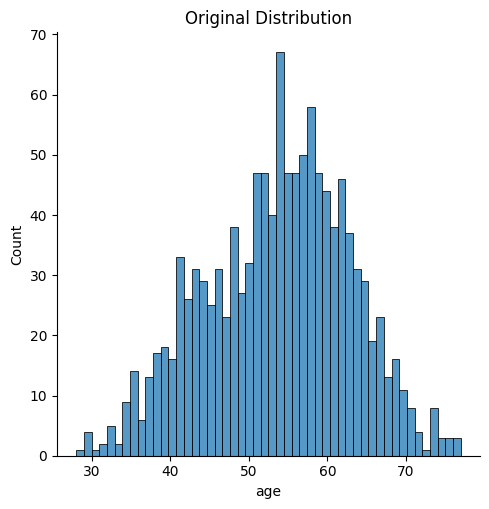

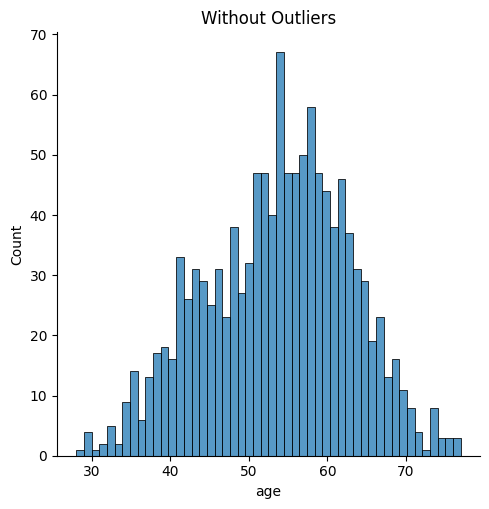

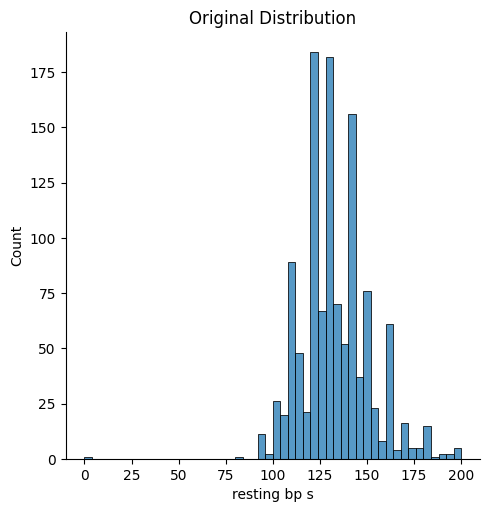

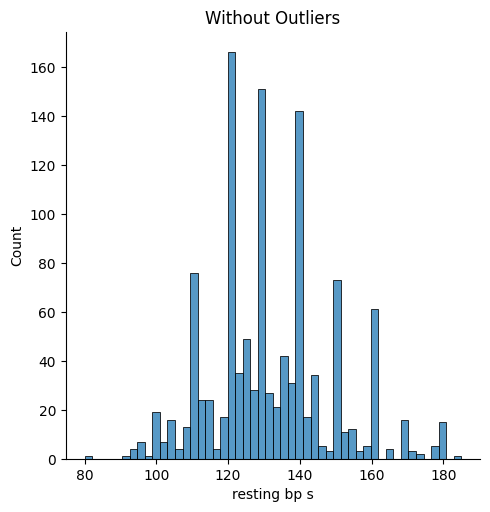

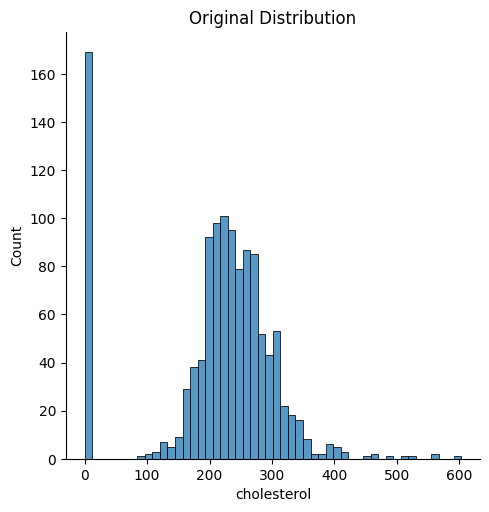

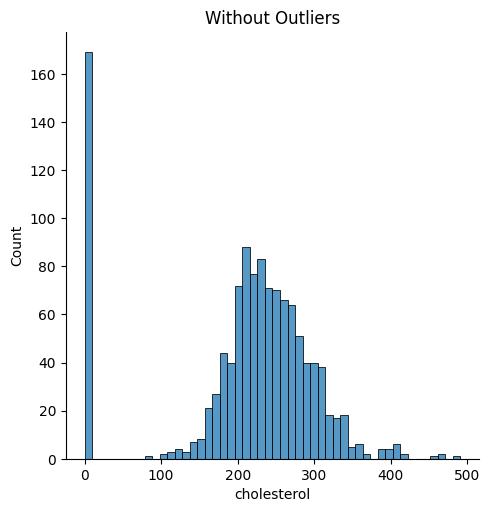

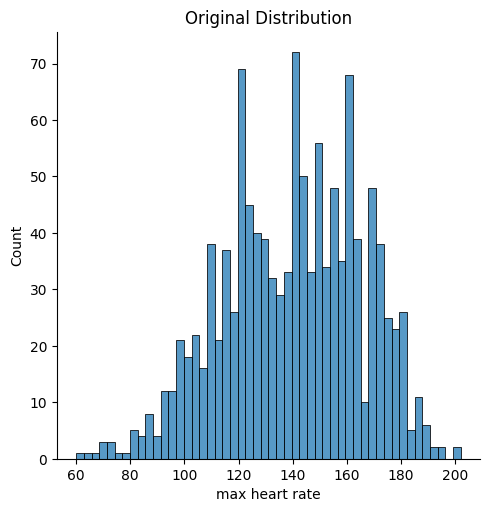

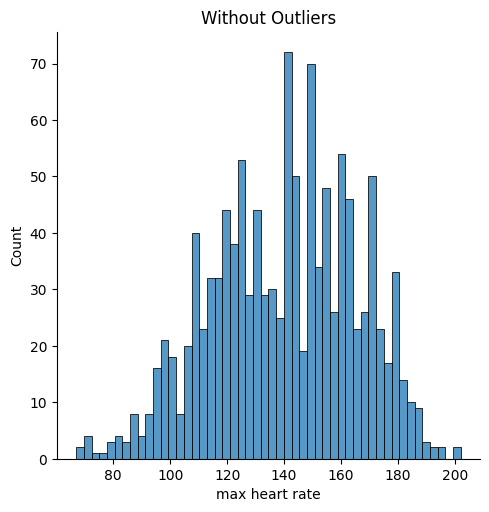

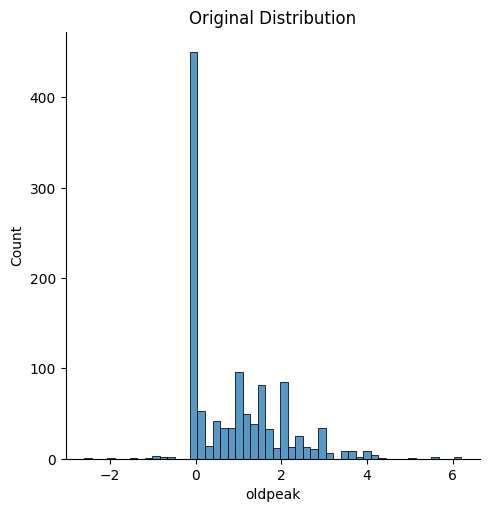

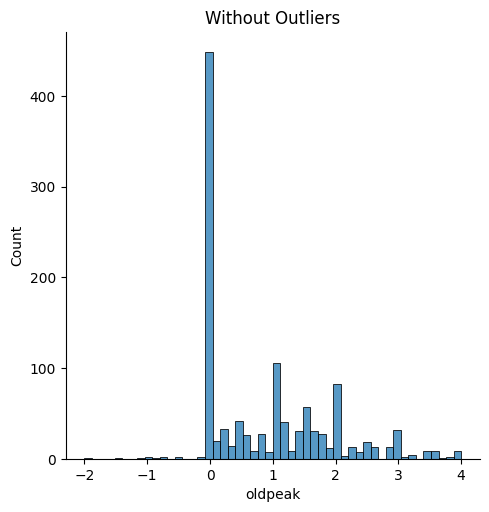

In [12]:
# we want to do some actions only to numerci columns.
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
# drop outlier samples for each of these features in a loop so all outliers from each feature will be droped
for feature in numeric_features:
    sns.displot(df[feature],kde= False, bins= 50).set(title="Original Distribution")
    df['z_score']=stats.zscore(df[feature])
    outliers = df.loc[df['z_score'].abs()>3]
    df = df.loc[df['z_score'].abs()<=3]
    sns.displot(df[feature],kde= False, bins= 50).set(title="Without Outliers")

df = df.drop(['z_score'], axis=1)
print("number of outliers:", outliers.shape,"\n")
print("The outlier samples head are as follow: \n", outliers.head(), "\n")
print("Updated dataframe size: ",df.shape)

In [13]:
# scale numeric data to [0,1] using minmax method
for feature in numeric_features:
    max_value = df[feature].max()
    min_value = df[feature].min()
    df[feature] = (df[feature] - min_value) / (max_value - min_value)
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1,2,0.571429,0.588595,0,0,0.777778,0,0.333333,1,0
1,0.428571,0,3,0.761905,0.366599,0,0,0.659259,0,0.500000,2,1
2,0.183673,1,2,0.476190,0.576375,0,1,0.229630,0,0.333333,1,0
3,0.408163,0,4,0.552381,0.435845,0,0,0.303704,1,0.583333,2,1
4,0.530612,1,3,0.666667,0.397149,0,0,0.407407,0,0.333333,1,0


In [14]:
# split using sklearn.model_selection.train_test_split function, which test data is 30%
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)
df_train.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
879,0.612245,1,2,0.380952,0.578411,0,2,0.688889,0,0.633333,2,1
113,0.204082,1,2,0.571429,0.604888,0,0,0.614815,0,0.333333,1,0
862,0.653061,1,4,0.476190,0.515275,0,0,0.570370,1,0.566667,1,1
675,0.632653,0,4,0.895238,0.507128,0,0,0.562963,1,0.333333,2,1
936,0.510204,1,3,0.476190,0.401222,1,2,0.629630,0,0.533333,3,0


In [15]:
# split feature and labels
x_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']
x_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']

In [16]:
# SVM Kernel: Linear
# testing different value for C to reach the best accuracy
acc = 0
final_C = 0.1
C_range = [5e-3, 1e-2, 5e-2, 1e-1, 0.5, 1, 3, 5, 10]
for temp_C in C_range:
    linear_model = svm.SVC(kernel='linear',C= temp_C,random_state=42)
    linear_model.fit(x_train, y_train)
    y_pred = linear_model.predict(x_test)
    temp_acc = metrics.accuracy_score(y_test, y_pred)
    if temp_acc > acc:
        final_C = temp_C
        acc = temp_acc

In [17]:
# fit the model with the best C and show the results
linear_model = svm.SVC(kernel='linear',C= final_C,random_state=42)
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
print("linear kernel \n")
print("Best C:",final_C)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))


linear kernel 

Best C: 1
Accuracy: 0.830945558739255
Precision: 0.801980198019802
Recall: 0.8950276243093923
F1_Score: 0.8459530026109662


In [18]:
#SVM Kernel: RBF.
#test different values for hyperparameters C and gamma
acc = 0
final_C = 0.1
final_gamma = 0.1
C_range = [5e-3, 1e-2, 5e-2, 1e-1, 0.5, 1, 3, 5, 10]
gamma_range = np.arange(0.1, 1, 0.05)
for C in C_range:
    for gamma in gamma_range:
        rbf_model = svm.SVC(C=C, gamma=gamma, kernel="rbf", random_state=42)
        rbf_model.fit(x_train, y_train)
        y_pred = rbf_model.predict(x_test)
        temp_acc = metrics.accuracy_score(y_test, y_pred)
        if temp_acc > acc:
            final_C = C
            acc = temp_acc
            final_gamma = gamma

rbf_model = svm.SVC(C=final_C, gamma=final_gamma, kernel="rbf", random_state=42)
rbf_model.fit(x_train, y_train)
y_pred = rbf_model.predict(x_test)
print("rbf kernel \n")
print("Best C:",final_C)
print("gamma:",final_gamma)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

rbf kernel 

Best C: 10
gamma: 0.3500000000000001
Accuracy: 0.8653295128939829
Precision: 0.8418367346938775
Recall: 0.9116022099447514
F1_Score: 0.8753315649867375


In [19]:
#SVM Kernel: Polynomial
# test different values for hyperparameters C, degree and gamma
acc = 0
final_C = 1
final_gamma = 0.1
final_degree =  2
final_coef0 = -50
C_range = [1]
gamma_range = [0.1, 1]
degree_range = [2, 3]
coef0_range = [-50, -1, 0, 1, 50]
for C in C_range:
    for degree in degree_range:
        for gamma in gamma_range:
            for coef0 in coef0_range:
                polynomial_model = svm.SVC(C=C, gamma=gamma, degree=degree, coef0=coef0, kernel="poly", random_state=42)
                polynomial_model.fit(x_train, y_train)
                y_pred = polynomial_model.predict(x_test)
                temp_acc = metrics.accuracy_score(y_test, y_pred)
                if temp_acc > acc:
                    final_C = C
                    acc = temp_acc
                    final_gamma = gamma
                    final_degree = degree
                    final_coef0
print("polynomial kernel \n")
print("Best C:",final_C)
print("gamma:",final_gamma)
print("degree:", final_degree)
print("coef0:",final_coef0)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

polynomial kernel 

Best C: 1
gamma: 1
degree: 2
coef0: -50
Accuracy: 0.8595988538681948
Precision: 0.851063829787234
Recall: 0.8839779005524862
F1_Score: 0.8672086720867209


In [ ]:
# a reference which has been used for this question:
# https://www.kaggle.com/code/carlosdg/effect-of-hyperparameters-and-kernels-on-svms